# Kaggle 사이트의 Cactus를 PC에서 실행


In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
train_dir = '../dataset/cactus/train/'
test_dir = '../dataset/cactus/test/'

In [3]:
csv_path = '../dataset/cactus/train.csv'

df = pd.read_csv(csv_path)

In [4]:
df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [5]:
filenames = df['id']
filenames.head()

0    0004be2cfeaba1c0361d39e2b000257b.jpg
1    000c8a36845c0208e833c79c1bffedd1.jpg
2    000d1e9a533f62e55c289303b072733d.jpg
3    0011485b40695e9138e92d0b3fb55128.jpg
4    0014d7a11e90b62848904c1418fc8cf2.jpg
Name: id, dtype: object

In [6]:
file_paths = [os.path.join(train_dir, fname) for fname in filenames]
file_paths[:5]

['../dataset/cactus/train/0004be2cfeaba1c0361d39e2b000257b.jpg',
 '../dataset/cactus/train/000c8a36845c0208e833c79c1bffedd1.jpg',
 '../dataset/cactus/train/000d1e9a533f62e55c289303b072733d.jpg',
 '../dataset/cactus/train/0011485b40695e9138e92d0b3fb55128.jpg',
 '../dataset/cactus/train/0014d7a11e90b62848904c1418fc8cf2.jpg']

In [7]:
train_df = pd.DataFrame(data={'id': file_paths, 'has_cactus': df['has_cactus']})
train_df.head()

,id,has_cactus
0,../dataset/cactus/train/0004be2cfeaba1c0361d39...,1
1,../dataset/cactus/train/000c8a36845c0208e833c7...,1
2,../dataset/cactus/train/000d1e9a533f62e55c2893...,1
3,../dataset/cactus/train/0011485b40695e9138e92d...,1
4,../dataset/cactus/train/0014d7a11e90b62848904c...,1


In [8]:
train_df = train_df.astype(np.str)

In [9]:
sample_csv_path = '../dataset/cactus/sample_submission.csv'
sample_df = pd.read_csv(sample_csv_path)
sample_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [10]:
len(train_df)

17500

In [11]:
train_df = train_df[:-500]
test_df = train_df[-500:]

len(train_df), len(test_df)

(17000, 500)

In [12]:
path = train_df['id'][0]

# Load Packages

In [32]:
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Explore

In [14]:
train_df.head()

,id,has_cactus
0,../dataset/cactus/train/0004be2cfeaba1c0361d39...,1
1,../dataset/cactus/train/000c8a36845c0208e833c7...,1
2,../dataset/cactus/train/000d1e9a533f62e55c2893...,1
3,../dataset/cactus/train/0011485b40695e9138e92d...,1
4,../dataset/cactus/train/0014d7a11e90b62848904c...,1


In [15]:
img_pil = Image.open(path)
image = np.array(img_pil)

image.shape

(32, 32, 3)

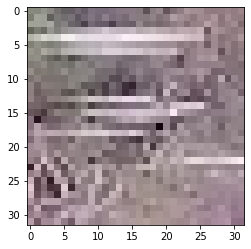

In [16]:
plt.imshow(image)
plt.show()

# Hyperparameter

In [17]:
input_shape = (32, 32, 3)
batch_size = 32
num_classes = 2
num_epochs = 1 # 10을 1로 변경 (시간이 1epoch당 22분 소요됨)

learning_rate = 0.01

# Model

In [18]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(64, (3, 3), padding='same')(inputs)
net = layers.Conv2D(64, (3, 3), padding='same')(net)
net = layers.Conv2D(64, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)

net = layers.Conv2D(128, (3, 3), padding='same')(net)
net = layers.Conv2D(128, (3, 3), padding='same')(net)
net = layers.Conv2D(128, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(256, (3, 3), padding='same')(net)
net = layers.Conv2D(256, (3, 3), padding='same')(net)
net = layers.Conv2D(256, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.Conv2D(512, (3, 3), padding='same')(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net)

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate),
              metrics=['accuracy'])

# Data Preprocess

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255.
)

In [21]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='id',
    y_col='has_cactus',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='id',
    y_col='has_cactus',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='sparse'
)

Found 17000 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.


# Train

In [22]:
# 1 epoch당 21분 소요됨 (노트북 사용시)
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=num_epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Instructions for updating:
Please use Model.fit, which supports generators.
532/532 [==============================] - 1408s 3s/step - loss: 0.6607 - accuracy: 0.7446 - val_loss: 0.3700 - val_accuracy: 0.7380


# Evaluate

In [23]:
test_dir

'../dataset/cactus/test/'

In [24]:
sample_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [25]:
path = os.path.join(test_dir, sample_df['id'][0])

In [26]:
img_pil = Image.open(path)
image = np.array(img_pil)
image.shape

(32, 32, 3)

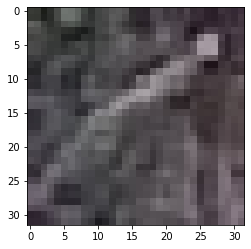

In [27]:
plt.imshow(image)
plt.show()

In [28]:
pred = model.predict(image[tf.newaxis, ...])
pred

array([[0., 1.]], dtype=float32)

In [29]:
pred = np.argmax(pred)
pred

1

In [33]:
preds = []

for fname in tqdm(sample_df['id']):
    path = os.path.join(test_dir, fname)

    img_pil = Image.open(path)
    image = np.array(img_pil)

    pred = model.predict(image[tf.newaxis, ...])
    pred = np.argmax(pred)
    preds.append(pred)


In [34]:
submission_df = pd.DataFrame(data={'id': sample_df['id'], 'has_cactus': preds})

In [35]:
submission_df.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,1
1,0017242f54ececa4512b4d7937d1e21e.jpg,1
2,001ee6d8564003107853118ab87df407.jpg,1
3,002e175c3c1e060769475f52182583d0.jpg,1
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,1


In [36]:
submission_df.to_csv('samplesubmission.csv', index=False)